In [134]:
import pandas as pd
import numpy as np

In [135]:
df = pd.read_pickle('../stock_data/TSM.pkl')

In [136]:
def calculate_wma_10(data):
    weights = np.arange(1, 11)[::-1]
    return np.dot(data, weights) / weights.sum()

def calculate_future_average(row, df):
    one_month_later = row.name + pd.DateOffset(weeks=4)
    four_months_later = row.name + pd.DateOffset(weeks=16)
    # future_df = df[(df.index > one_months_later) & (df.index <= four_months_later)]
    if df.index[-1] > four_months_later:
        return (df.loc[four_months_later]['wma10'] + df.loc[four_months_later]['wma30'])/ (df.loc[one_month_later]['wma10'] + df.loc[one_month_later]['wma30']) 
    else:
        return None

df['wma10'] = df['close'].rolling(window=10).apply(calculate_wma_10, raw=True)
df['future_wma_slope'] = df.apply(calculate_future_average, df=df, axis=1)
df = df.dropna()

def label_stocks(row):
    if row['future_wma_slope'] >= 1.10:
        return 2
    elif row['future_wma_slope'] <= 0.95:
        return 4
    else:
        return 1
    
    
df['stage'] = df.apply(label_stocks, axis=1)

for i in range(1, len(df)):
    if df.iloc[i]['stage'] == 1:
        if (df.iloc[i-1]['stage'] == 2 and df.iloc[i]['future_wma_slope'] >= 1.05):
            df.iloc[i,9] = 2
        if (df.iloc[i-1]['stage'] == 2 or df.iloc[i-1]['stage'] == 3) and df.iloc[i]['stage'] != 4:
            df.iloc[i,9] = 3



In [137]:
# pd.set_option('display.max_rows', None)  # None means no maximum limit
# pd.set_option('display.max_columns', None)  # None means no maximum limit
# pd.set_option('display.max_colwidth', None)  # Display full content of each cell

# display(df)

,open,high,low,close,volume,wma30,fyh,wma10,future_wma_slope,stage
2020-05-08,51.790001,53.340000,51.279999,52.910000,35080800,54.210710,60.639999,50.135454,1.151613,2
2020-05-15,52.610001,52.830002,49.380001,49.799999,55127600,54.494065,60.639999,49.200727,1.173400,2
2020-05-22,50.939999,52.209999,49.610001,49.799999,54377900,54.655204,60.639999,48.738182,1.194307,2
2020-05-29,51.299999,51.740002,49.860001,50.330002,39374900,54.749957,60.639999,49.781091,1.221500,2
2020-06-05,50.910000,56.340000,50.540001,55.200001,43676700,54.802710,60.639999,50.542000,1.246096,2
2020-06-12,55.740002,58.040001,54.709999,56.000000,44567400,54.831613,60.639999,51.438182,1.255055,2
2020-06-19,54.709999,57.000000,54.520000,55.310001,38382200,54.898193,60.639999,52.230363,1.260158,2
2020-06-26,55.500000,57.259998,55.320000,56.330002,30136000,54.952387,60.639999,52.096000,1.258208,2
2020-07-03,56.340000,59.070000,55.660000,58.619999,29063000,54.895140,60.639999,52.243273,1.253223,2
2020-07-10,60.669998,64.970001,60.560001,63.849998,55723100,54.636387,64.970001,52.918727,1.245213,2


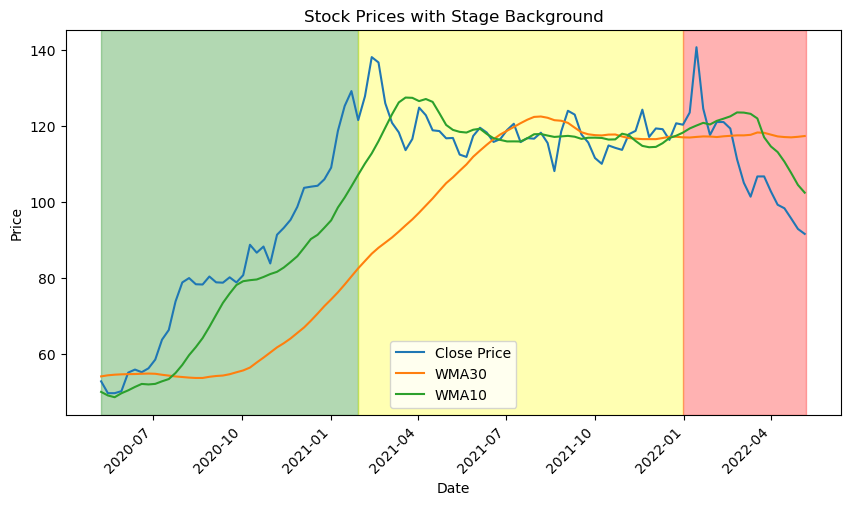

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded
start_date = '2020-05-08'  # Example start date

# Calculate the end date, which is two years from the start date
end_date = pd.to_datetime(start_date) + pd.DateOffset(years=2)

# Select the data between the start date and end date
df = df.loc[start_date:end_date]

display(df)


# Define your color mapping for stages
color_map = {
    1: 'blue',  # Example color for stage 1
    2: 'green',   # Example color for stage 2
    3: 'yellow', # Example color for stage 3
    4: 'red',    # Example color for stage 4
}

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the 'close' prices (or whatever data you are interested in)
ax.plot(df.index, df['close'], label='Close Price')
ax.plot(df.index, df['wma30'], label='WMA30')
ax.plot(df.index, df['wma10'], label='WMA10')

# Go through the DataFrame and add colored spans
current_stage = None
stage_start_index = None

for i, (idx, row) in enumerate(df.iterrows()):
    # Check if the stage has changed
    if row['stage'] != current_stage:
        # If we are not at the first index and we have a stage set, add a span
        if stage_start_index is not None:
            ax.axvspan(stage_start_index, idx, color=color_map[current_stage], alpha=0.3)
        # Update the current stage and start index
        current_stage = row['stage']
        stage_start_index = idx

# Add the last span
if current_stage is not None:
    # Note that we need to add a Timedelta to the last index for the span to show correctly
    last_date = df.index[-1] + pd.Timedelta(days=1)
    ax.axvspan(stage_start_index, last_date, color=color_map[current_stage], alpha=0.3)

# Additional plot formatting
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Stock Prices with Stage Background')
ax.legend()

# Rotate date labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()
